In [1]:
import netCDF4
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, pyproj
import numpy as np
%matplotlib inline

Scott,

I am working through the reviewer comments on the BAMS paper. One of the reviewers is asking for a more consistent introduction to each case (May 11, May 20, May 23rd) including some sort of dynamical analysis. I think that this is a good idea, and am trying to figure out who to proceed. I think what we want to do is include a surface meteorological analysis map (SLP, T,Td, winds or something like that) for each case. Scott G. mentioned that thought you might already have a source and some code to do this type of thing? Is this something you could do?

Mike

Hey Scott,

Thanks. I think this looks great.

A few suggestions to try?

- I think we could shrink the area a little bit (not much though). Maybe cut off at the front range in west and Lake Michigan in east?
- I think it is good to use colors, but the big dark blue are in the west is pretty distracting. Maybe this won't be an issue if the area is cut down some, or maybe a different colormap?
- I think it would be good to indicate the MC3E domain on the map somehow.

Mike 

23rd started around 1900.. so this timestep

http://nomads.ncdc.noaa.gov/thredds/catalog/narr-a/201105/20110523/catalog.html?dataset=narr-a/201105/20110523/narr-a_221_20110523_1200_000.grb

In [3]:
dataset_0523 = netCDF4.Dataset('http://nomads.ncdc.noaa.gov/thredds/dodsC/narr-a/201105/20110523/narr-a_221_20110523_1200_000.grb')

In [16]:
sites = {'C1' : [-97.485, 36.695],
         'S1' : [-98.75, 37.7],
         'S2' : [-95.488, 37.674],
         'S3' : [-99.204, 36.071],
         'S4' : [-95.586, 35.687],
         'S5' : [-97.522, 34.985]
         }

In [25]:
def plot_labels(basemap_instance, labels):
    for loc in labels.keys():
        x,y = basemap_instance(labels[loc][0], labels[loc][1])
        plt.text(x+10000, y, loc, fontsize = 15)
        plt.plot(x,y, 'ro')

In [12]:
xg, yg = np.meshgrid(dataset_0523.variables['x'][:]*1000.0, dataset_0523.variables['y'][:]*1000.0)
pnyc = pyproj.Proj(
     proj='lcc',
     datum='NAD83',
     lat_0=50.0,
     lat_1=50.0,
     lat_2=50.0,
     lon_0=-107.0)

lons, lats = pnyc(xg ,
                  yg , inverse=True)
lons[np.where(lons >= 0)] = lons[np.where(lons >= 0)] -360.


<matplotlib.colorbar.Colorbar instance at 0x115a79f80>

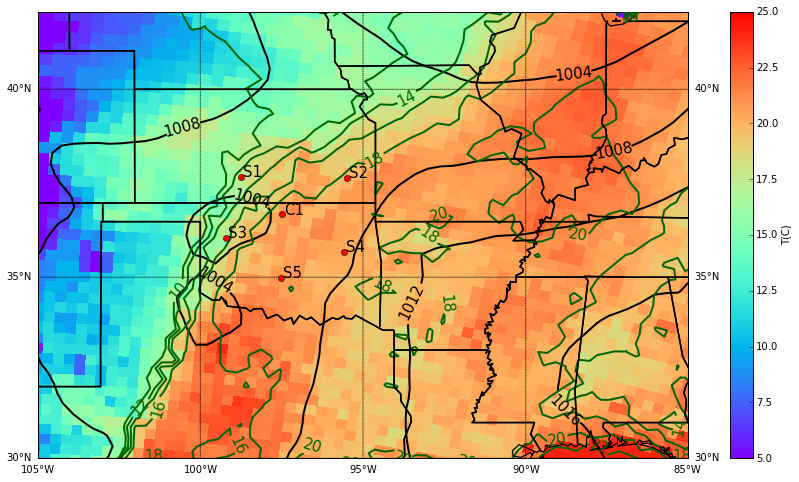

In [26]:
f = plt.figure(figsize = [15,8])
m = Basemap(llcrnrlon = -105,llcrnrlat = 30, urcrnrlon = -85,
               urcrnrlat = 42 , projection = 'mill', area_thresh =1000 ,
               resolution='l')
x, y = m(lons, lats)
my_mesh = m.pcolormesh(x, y, 
                       dataset_0523.variables['Temperature_surface'][0,:,:]-273.15,
                       vmin = 5, vmax = 25, cmap=plt.get_cmap('rainbow'))
clevs = np.arange(900, 1100., 4.)
myc=m.contour(x, y, dataset_0523.variables['Pressure_reduced_to_MSL'][0,:,:]/100.0, clevs, colors='k', linewidths=2.)
plt.clabel(myc, inline=1, fontsize=15,fmt='%1.0f')

clevs2 = np.arange(10, 30, 2.)
myc2=m.contour(x, y, dataset_0523.variables['Dew_point_temperature'][0,0,:,:]-273., clevs2, colors='darkgreen', linewidths=2.)
plt.clabel(myc2, inline=1, fontsize=15,fmt='%1.0f')


my_coast = m.drawcoastlines(linewidth=1.25)
my_states = m.drawstates(linewidth = 1.5)
m.drawparallels(np.linspace(10,50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 

plot_labels(m, sites)

plt.colorbar(label='T(C)', mappable=my_mesh)   

<matplotlib.colorbar.Colorbar instance at 0x117182a28>

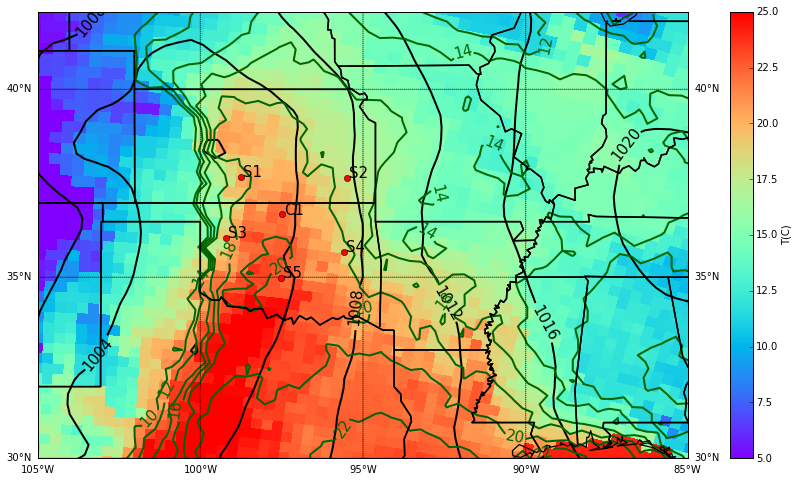

In [27]:
dataset = netCDF4.Dataset('http://nomads.ncdc.noaa.gov/thredds/dodsC/narr-a/201105/20110520/narr-a_221_20110520_0600_000.grb')
xg, yg = np.meshgrid(dataset.variables['x'][:]*1000.0, dataset.variables['y'][:]*1000.0)
pnyc = pyproj.Proj(
     proj='lcc',
     datum='NAD83',
     lat_0=50.0,
     lat_1=50.0,
     lat_2=50.0,
     lon_0=-107.0)

lons, lats = pnyc(xg ,
                  yg , inverse=True)
lons[np.where(lons >= 0)] = lons[np.where(lons >= 0)] -360.
f = plt.figure(figsize = [15,8])
m = Basemap(llcrnrlon = -105,llcrnrlat = 30, urcrnrlon = -85,
               urcrnrlat = 42 , projection = 'mill', area_thresh =1000 ,
               resolution='l')
x, y = m(lons, lats)
my_mesh = m.pcolormesh(x, y, 
                       dataset.variables['Temperature_surface'][0,:,:]-273.15,
                       vmin = 5, vmax = 25, cmap=plt.get_cmap('rainbow'))
clevs = np.arange(900, 1100., 4.)
myc=m.contour(x, y, dataset.variables['Pressure_reduced_to_MSL'][0,:,:]/100.0, clevs, colors='k', linewidths=2.)
plt.clabel(myc, inline=1, fontsize=15,fmt='%1.0f')

clevs2 = np.arange(10, 30, 2.)
myc2=m.contour(x, y, dataset.variables['Dew_point_temperature'][0,0,:,:]-273., 
               clevs2, colors='darkgreen', linewidths=2.)
plt.clabel(myc2, inline=1, fontsize=15,fmt='%1.0f')


my_coast = m.drawcoastlines(linewidth=1.25)
my_states = m.drawstates(linewidth = 1.5)
m.drawparallels(np.linspace(10,50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
plot_labels(m, sites)

plt.colorbar(label='T(C)', mappable=my_mesh)   

<matplotlib.colorbar.Colorbar instance at 0x11c29bc20>

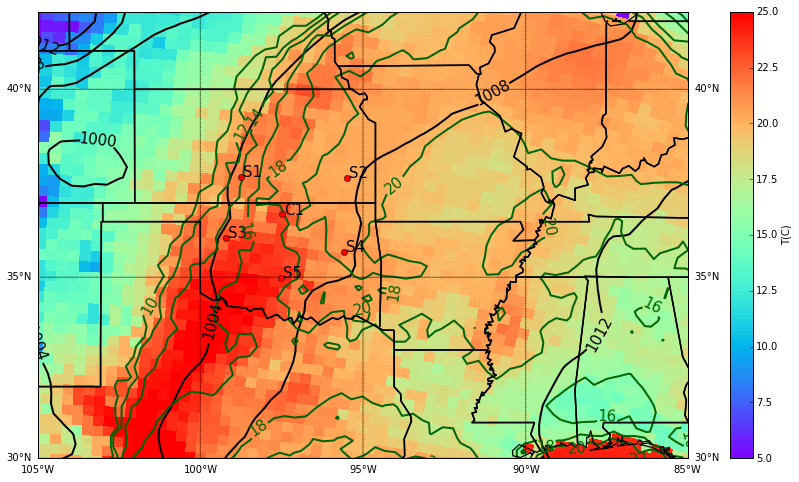

In [28]:
dataset = netCDF4.Dataset('http://nomads.ncdc.noaa.gov/thredds/dodsC/narr-a/201105/20110511/narr-a_221_20110511_0600_000.grb')
xg, yg = np.meshgrid(dataset.variables['x'][:]*1000.0, dataset.variables['y'][:]*1000.0)
pnyc = pyproj.Proj(
     proj='lcc',
     datum='NAD83',
     lat_0=50.0,
     lat_1=50.0,
     lat_2=50.0,
     lon_0=-107.0)

lons, lats = pnyc(xg ,
                  yg , inverse=True)
lons[np.where(lons >= 0)] = lons[np.where(lons >= 0)] -360.
f = plt.figure(figsize = [15,8])
m = Basemap(llcrnrlon = -105,llcrnrlat = 30, urcrnrlon = -85,
               urcrnrlat = 42 , projection = 'mill', area_thresh =1000 ,
               resolution='l')
x, y = m(lons, lats)
my_mesh = m.pcolormesh(x, y, 
                       dataset.variables['Temperature_surface'][0,:,:]-273.15,
                       vmin = 5, vmax = 25, cmap=plt.get_cmap('rainbow'))
clevs = np.arange(900, 1100., 4.)
myc=m.contour(x, y, dataset.variables['Pressure_reduced_to_MSL'][0,:,:]/100.0, clevs, colors='k', linewidths=2.)
plt.clabel(myc, inline=1, fontsize=15,fmt='%1.0f')

clevs2 = np.arange(10, 30, 2.)
myc2=m.contour(x, y, dataset.variables['Dew_point_temperature'][0,0,:,:]-273., 
               clevs2, colors='darkgreen', linewidths=2.)
plt.clabel(myc2, inline=1, fontsize=15,fmt='%1.0f')


my_coast = m.drawcoastlines(linewidth=1.25)
my_states = m.drawstates(linewidth = 1.5)
m.drawparallels(np.linspace(10,50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
plot_labels(m, sites)

plt.colorbar(label='T(C)', mappable=my_mesh)   